In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sklearn
import os
from sklearn.model_selection import train_test_split

In [3]:
def convert_to_categorical(time_str):
    hour = int(time_str.split(':')[0])
    
    if 0 <= hour < 3:
        return 'Late Night'
    elif 3 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Noon'
    elif 15 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [4]:
data = pd.read_csv("SYR_ORIGIN_WEATHER_IMPUTED.csv")

In [5]:
data.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,...,SYR_wind_type,SYR_wind_speed,SYR_ceiling_height,SYR_ceiling_det_code,SYR_celing_CAVOK,SYR_visibility_dist,SYR_visibility_variability,SYR_air_temparature,SYR_dew_point_temparature,SYR_sea_level_pressure
0,B6,2010-01-01,JFK,00:01,76,LATE,1,1,winter,Friday,...,N,17.4,741.370199,M,N,6110.0,N,-4.8,-24.0,10154.572817
1,B6,2010-01-01,JFK,08:55,75,LATE,1,1,winter,Friday,...,C,0.0,548.800000,M,N,2414.0,N,-17.0,-28.8,10132.352069
2,MQ,2010-01-01,ORD,11:20,100,ONTIME,1,1,winter,Friday,...,C,0.0,841.400000,M,N,3138.4,N,-19.4,-29.6,10129.796558
3,9E,2010-01-01,DTW,11:44,84,LATE,1,1,winter,Friday,...,C,0.0,1006.000000,M,N,3138.4,N,-19.8,-29.2,10129.482076
4,B6,2010-01-01,JFK,11:52,71,LATE,1,1,winter,Friday,...,C,0.0,1006.000000,M,N,3138.4,N,-19.8,-29.2,10129.482076


In [6]:
tmp = data[['latitude', 'longitude', 'elevation',
       'wind_direction',  'wind_speed', 'ceiling_height','visibility_dist', 'air_temparature', 'dew_point_temparature',
       'sea_level_pressure']]

<Axes: >

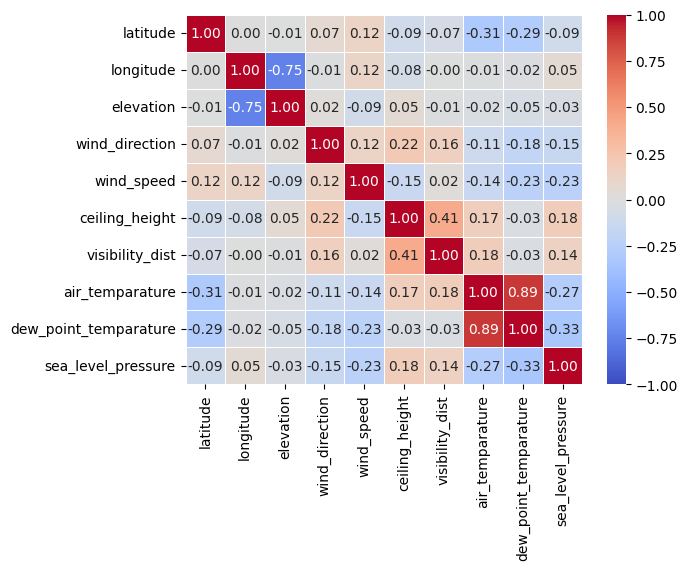

In [7]:
sns.heatmap(tmp.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

In [8]:
data.head()

,Carrier Code,Date (MM/DD/YYYY),Origin Airport,Scheduled Arrival Time,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,day,season,WeekDay,...,SYR_wind_type,SYR_wind_speed,SYR_ceiling_height,SYR_ceiling_det_code,SYR_celing_CAVOK,SYR_visibility_dist,SYR_visibility_variability,SYR_air_temparature,SYR_dew_point_temparature,SYR_sea_level_pressure
0,B6,2010-01-01,JFK,00:01,76,LATE,1,1,winter,Friday,...,N,17.4,741.370199,M,N,6110.0,N,-4.8,-24.0,10154.572817
1,B6,2010-01-01,JFK,08:55,75,LATE,1,1,winter,Friday,...,C,0.0,548.800000,M,N,2414.0,N,-17.0,-28.8,10132.352069
2,MQ,2010-01-01,ORD,11:20,100,ONTIME,1,1,winter,Friday,...,C,0.0,841.400000,M,N,3138.4,N,-19.4,-29.6,10129.796558
3,9E,2010-01-01,DTW,11:44,84,LATE,1,1,winter,Friday,...,C,0.0,1006.000000,M,N,3138.4,N,-19.8,-29.2,10129.482076
4,B6,2010-01-01,JFK,11:52,71,LATE,1,1,winter,Friday,...,C,0.0,1006.000000,M,N,3138.4,N,-19.8,-29.2,10129.482076


In [9]:
data['SCHED_ARRV_TIME_CAT'] = data['Scheduled Arrival Time'].apply(convert_to_categorical)

In [10]:
data.shape

(113671, 41)

In [11]:
data.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Origin Airport',
       'Scheduled Arrival Time', 'Scheduled Elapsed Time (Minutes)',
       'FLIGHT_STATUS', 'month', 'day', 'season', 'WeekDay', 'UNIX_DATE',
       'UNIX_TIMESTAMP', 'latitude', 'longitude', 'elevation',
       'wind_direction', 'wind_type', 'wind_speed', 'ceiling_height',
       'ceiling_det_code', 'celing_CAVOK', 'visibility_dist',
       'visibility_variability', 'air_temparature', 'dew_point_temparature',
       'sea_level_pressure', 'SYR_latitude', 'SYR_longitude', 'SYR_elevation',
       'SYR_wind_direction', 'SYR_wind_type', 'SYR_wind_speed',
       'SYR_ceiling_height', 'SYR_ceiling_det_code', 'SYR_celing_CAVOK',
       'SYR_visibility_dist', 'SYR_visibility_variability',
       'SYR_air_temparature', 'SYR_dew_point_temparature',
       'SYR_sea_level_pressure', 'SCHED_ARRV_TIME_CAT'],
      dtype='object')

In [12]:
# data = data[data['Origin Airport'].isin(['JFK','ORD','MCO'])]

In [13]:
data.shape

(113671, 41)

In [14]:
df = data.drop(columns=['Date (MM/DD/YYYY)', 'Scheduled Arrival Time','day', 'UNIX_DATE','UNIX_TIMESTAMP','longitude','dew_point_temparature', 'wind_type','ceiling_height','ceiling_det_code', 'celing_CAVOK','visibility_variability','SYR_longitude',
'SYR_wind_type','SYR_ceiling_height', 'SYR_ceiling_det_code','SYR_celing_CAVOK', 'SYR_visibility_variability','SYR_dew_point_temparature','SYR_latitude','SYR_elevation'])

In [15]:
df.columns

Index(['Carrier Code', 'Origin Airport', 'Scheduled Elapsed Time (Minutes)',
       'FLIGHT_STATUS', 'month', 'season', 'WeekDay', 'latitude', 'elevation',
       'wind_direction', 'wind_speed', 'visibility_dist', 'air_temparature',
       'sea_level_pressure', 'SYR_wind_direction', 'SYR_wind_speed',
       'SYR_visibility_dist', 'SYR_air_temparature', 'SYR_sea_level_pressure',
       'SCHED_ARRV_TIME_CAT'],
      dtype='object')

In [16]:
df.isna().sum()

Carrier Code                        0
Origin Airport                      0
Scheduled Elapsed Time (Minutes)    0
FLIGHT_STATUS                       0
month                               0
season                              0
WeekDay                             0
latitude                            0
elevation                           0
wind_direction                      0
wind_speed                          0
visibility_dist                     0
air_temparature                     0
sea_level_pressure                  0
SYR_wind_direction                  0
SYR_wind_speed                      0
SYR_visibility_dist                 0
SYR_air_temparature                 0
SYR_sea_level_pressure              0
SCHED_ARRV_TIME_CAT                 0
dtype: int64

In [17]:
df.shape

(113671, 20)

In [18]:
df['SYR_sea_level_pressure'] = df['SYR_sea_level_pressure']


In [19]:
def mps_to_mph(speed_mps):
    return (speed_mps/10.0) * 2.23694
def meters_to_miles(distance_meters): 
    return distance_meters * 0.000621371
def celsius_to_fahrenheit(temperature_celsius): 
    return (temperature_celsius/10.0) * 9/5 + 32
def hectopascal_to_mb(v): 
    return v/10.0

In [20]:
df.tail()

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
113666,DL,DTW,83,EARLY,12,winter,Sunday,42.23113,191.9,240.000000,20.4,13143.4,34.8,10126.074551,226.0,25.8,15030.8,-17.0,10154.321162,Night
113667,WN,BWI,70,LATE,12,winter,Sunday,39.17329,42.0,243.746270,23.6,16074.4,88.6,10154.400000,226.0,25.8,15030.8,-17.0,10154.321162,Night
113668,AA,DFW,181,ONTIME,12,winter,Sunday,32.56500,213.4,199.866450,10.4,16093.0,184.0,10167.225662,226.0,25.8,15030.8,-17.0,10154.321162,Night
113669,UA,DEN,198,ONTIME,12,winter,Sunday,39.84657,1647.2,191.233489,19.4,16074.4,42.0,10192.400000,226.0,25.8,15030.8,-17.0,10154.321162,Night
113670,UA,EWR,74,EARLY,12,winter,Sunday,40.68275,1.9,286.000000,34.0,16074.4,67.0,10155.536842,226.0,25.8,15030.8,-17.0,10154.321162,Night


In [21]:
df['SYR_visibility_dist'] = df['SYR_visibility_dist'].apply(meters_to_miles)
df['air_temparature'] = df['air_temparature'].apply(celsius_to_fahrenheit)
df['SYR_air_temparature'] = df['SYR_air_temparature'].apply(celsius_to_fahrenheit)
df['sea_level_pressure'] = df['sea_level_pressure'].apply(hectopascal_to_mb)
df['SYR_sea_level_pressure'] = df['SYR_sea_level_pressure'].apply(hectopascal_to_mb)


In [22]:
df[df.season=='spring'].head(50)

,Carrier Code,Origin Airport,Scheduled Elapsed Time (Minutes),FLIGHT_STATUS,month,season,WeekDay,latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,SYR_visibility_dist,SYR_air_temparature,SYR_sea_level_pressure,SCHED_ARRV_TIME_CAT
1666,B6,JFK,80,EARLY,3,spring,Monday,40.63915,3.4,210.000000,38.200000,16055.800000,37.940000,1003.380000,300.0,43.0,9.976609,35.600,1006.760000,Late Night
1667,9E,DTW,87,ONTIME,3,spring,Monday,42.23130,192.3,332.000000,26.000000,15449.400000,35.456000,1017.176569,298.0,36.0,8.199985,33.692,1008.654677,Morning
1668,OO,ORD,106,EARLY,3,spring,Monday,41.96019,201.8,216.000000,42.200000,16093.000000,33.008000,1021.027984,300.0,36.0,7.891287,33.548,1008.678891,Late Morning
1669,B6,JFK,84,EARLY,3,spring,Monday,40.63915,3.4,304.000000,85.400000,16055.800000,36.176000,1003.460000,300.0,36.0,7.891287,33.548,1008.678891,Late Morning
1670,OH,JFK,94,LATE,3,spring,Monday,40.63915,3.4,302.000000,84.200000,16074.400000,36.392000,1003.180000,308.0,39.0,8.091369,33.224,1008.953368,Late Morning
1671,MQ,ORD,105,LATE,3,spring,Monday,41.96019,201.8,146.000000,43.200000,16093.000000,31.820000,1021.388574,312.0,41.0,8.091369,33.224,1009.140395,Late Morning
1672,B6,JFK,78,ONTIME,3,spring,Monday,40.63915,3.4,304.000000,83.200000,16074.400000,36.788000,1003.220000,312.0,41.0,8.091369,33.224,1009.140395,Late Morning
1673,EV,ATL,137,EARLY,3,spring,Monday,33.63010,307.8,336.000000,30.000000,14787.200000,30.560000,1017.300000,320.0,43.0,8.939789,33.728,1009.959100,Noon
1674,XE,CLE,63,ONTIME,3,spring,Monday,41.40570,238.0,298.000000,24.000000,15430.800000,34.160000,1017.859973,324.0,44.2,9.539660,34.124,1010.277330,Noon
1675,YV,IAD,75,LATE,3,spring,Monday,38.93486,88.4,288.000000,56.400000,16074.400000,39.200000,1013.200000,330.0,45.2,9.739618,34.340,1010.457330,Noon


In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class MultiColumnOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = None

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_encoded = X.copy()
        encoded_data = self.encoder.transform(X[self.columns])
        encoded_df = pd.DataFrame(encoded_data, columns=self.encoder.get_feature_names_out(self.columns), index=X.index)
        
        # Drop the original columns
        X_encoded = X_encoded.drop(columns=self.columns)
        
        # Concatenate the encoded DataFrame with the original DataFrame, preserving the index
        X_encoded = pd.concat([X_encoded, encoded_df], axis=1)
        return X_encoded

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [24]:
sample = df.head()

In [25]:
encoder = MultiColumnOneHotEncoder(columns=['Carrier Code', 'Origin Airport','season', 'SCHED_ARRV_TIME_CAT', 'month', 'WeekDay']) #,'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability'

In [26]:
encoded_data = encoder.fit_transform(df.drop(columns=['FLIGHT_STATUS']))

In [27]:
encoded_data.head()

,Scheduled Elapsed Time (Minutes),latitude,elevation,wind_direction,wind_speed,visibility_dist,air_temparature,sea_level_pressure,SYR_wind_direction,SYR_wind_speed,...,month_9,month_10,month_11,month_12,WeekDay_Monday,WeekDay_Saturday,WeekDay_Sunday,WeekDay_Thursday,WeekDay_Tuesday,WeekDay_Wednesday
0,76,40.63915,3.4,102.428571,14.4,11212.0,33.944,1018.725782,106.000000,17.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75,40.63915,3.4,110.503072,0.0,8690.6,33.368,1015.367354,103.912190,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,41.96019,201.8,292.000000,42.0,16093.0,7.808,1024.780000,132.389021,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,42.23130,192.3,270.000000,55.4,10621.4,23.000,1018.248971,144.543770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,71,40.63915,3.4,159.721841,0.0,7715.6,33.224,1014.594175,144.543770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
trainX, testX, trainY, testY = train_test_split(
    encoded_data,
    df['FLIGHT_STATUS'], 
    test_size=0.2, 
    random_state=947,
    stratify=df['FLIGHT_STATUS']
)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def fit_and_evaluate(model, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    model.fit(trainX, trainY_encoded)
    testY_pred = model.predict(testX)
    accuracy = accuracy_score(testY_encoded, testY_pred)
    report = classification_report(testY_encoded, testY_pred, output_dict=True)
    results = {'accuracy': accuracy, 'classification_report': report}
    return results

# Update other classification functions similarly...


# Random Forest
from sklearn.ensemble import RandomForestClassifier

def random_forest_classification(trainX, trainY, testX, testY, n_estimators=100, criterion='gini', max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Support Vector Machines (SVM)
from sklearn.svm import SVC

def svm_classification(trainX, trainY, testX, testY, kernel='rbf', C=1.0):
    model = SVC(kernel=kernel, C=C)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(trainX, trainY, testX, testY, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

def gbm_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def naive_bayes_classification(trainX, trainY, testX, testY):
    model = GaussianNB()
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

def adaboost_classification(trainX, trainY, testX, testY, n_estimators=50, learning_rate=1.0):
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# XGBoost
from xgboost import XGBClassifier

def xgboost_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

def logistic_regression_classification(trainX, trainY, testX, testY, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'):
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver=solver, verbose=1 if max_iter > 300 else 0)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

def decision_tree_classification(trainX, trainY, testX, testY, criterion='gini', max_depth=None):

    # Get unique target names
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=5)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

In [31]:
# logistic_regression_classification(enc_trainX, trainY, enc_testX, testY, solver='saga', max_iter=1500, C=50)

In [32]:
# decision_tree_classification(enc_trainX, trainY, enc_testX, testY, max_depth=11, criterion='entropy')

In [33]:
# random_forest_classification(enc_trainX, trainY, enc_testX, testY)

In [34]:
# knn_classification(enc_trainX, trainY, enc_testX, testY)

In [35]:
# gbm_classification(enc_trainX, trainY, enc_testX, testY)

In [36]:
# naive_bayes_classification(enc_trainX, trainY, enc_testX, testY)

In [37]:
# adaboost_classification(enc_trainX, trainY, enc_testX, testY)

In [38]:
# xgboost_classification(enc_trainX, trainY, enc_testX, testY)

In [39]:
from sklearn.model_selection import GridSearchCV, KFold
def hyperparameter_tuning(model, param_grid, trainX, trainY, cv=5):
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    # Initialize K-Fold cross-validator
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=3, n_jobs=10, )
    grid_search.fit(trainX, trainY_encoded)
    
    return grid_search

In [40]:
params = {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9}
# param_grid = {
#     'n_estimators': [100, 200],  # Number of boosting rounds
#     'max_depth': [3, 5, 7, 11],  # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
#     'subsample': [0.7, 0.9],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.7, 0.9],  # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
#     'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights
# }
# model = XGBClassifier(**params)
# # best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [41]:
params =  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
# model = RandomForestClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [42]:
params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithm
}

# model = AdaBoostClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [43]:
params =  {'ccp_alpha': 0.07, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],  # Strategy to choose split at each node
    'max_depth': [None, 1, 3, 5],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Max features to consider for split
    'ccp_alpha':[0.07,0.01]
}

# model = DecisionTreeClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [44]:
# {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}
# model = GradientBoostingClassifier()
# best_model = hyperparameter_tuning(model, gbm_params, enc_trainX, trainY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(penalty='l2', C=50, max_iter=1500, solver='saga')
ada = AdaBoostClassifier(**{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200})
gbm = GradientBoostingClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})
rf = RandomForestClassifier(** {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200})
xgb = XGBClassifier(**{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9},objective='multi:softprob')

# res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)

votingCLF = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('ada', ada), 
        ('xgb', xgb), 
        ('lr', lr),
        ('gbm', gbm)
    ], 
    voting='soft', 
    weights=[4,5,7,2, 6]
)
fit_and_evaluate(votingCLF, enc_trainX, trainY, enc_testX, testY)

In [ ]:
INPUT = encoded_data
TARGET=df['FLIGHT_STATUS']
label_encoder = LabelEncoder()
TARGET_ENCODED = label_encoder.fit_transform(TARGET)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(encoded_data),index=encoded_data.index, columns=encoded_data.columns)

In [ ]:
votingCLF.fit(enc_trainX, TARGET_ENCODED)

In [ ]:
enc_trainX.shape

In [ ]:
initi_first_task = pd.read_csv("./sample_input_first_task.csv")

In [ ]:
initial_first_task_data = scaler.transform(encoder.transform(initi_first_task))

In [ ]:
initial_first_task_data.shape

In [ ]:
votingCLF.predict(initial_first_task_data)

In [ ]:
label_encoder.inverse_transform(votingCLF.predict(initial_first_task_data))

In [ ]:
initi_first_task = pd.read_csv("./final_input_first.csv")

In [ ]:
initial_first_task_data = scaler.transform(encoder.transform(initi_first_task))

In [ ]:
initial_first_task_data.shape

In [ ]:
votingCLF.predict(initial_first_task_data)


In [ ]:
label_encoder.inverse_transform(votingCLF.predict(initial_first_task_data))

# 2nd Model

In [ ]:
data1 = pd.read_csv("./1_HOP_WEATHER.csv")
data2 = pd.read_csv("./2_HOP_WEATHER.csv")
data3 = pd.read_csv("./3_HOP_WEATHER.csv")

In [ ]:
data1['SCHED_ARRV_TIME_CAT'] = data1['Scheduled Arrival Time'].apply(convert_to_categorical)
data2['SCHED_ARRV_TIME_CAT'] = data2['Scheduled Arrival Time'].apply(convert_to_categorical)
data3['SCHED_ARRV_TIME_CAT'] = data3['Scheduled Arrival Time'].apply(convert_to_categorical)

In [ ]:
data1.shape

In [ ]:
# data = data[data['Origin Airport'].isin(['JFK','ORD','MCO'])]

In [ ]:
data2.shape

In [ ]:
df1 = data1.drop(columns=['Date (MM/DD/YYYY)', 'Scheduled Arrival Time','day', 'UNIX_DATE','UNIX_TIMESTAMP','longitude','dew_point_temparature', 'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability' ])
df2 = data2.drop(columns=['Date (MM/DD/YYYY)', 'Scheduled Arrival Time','day', 'UNIX_DATE','UNIX_TIMESTAMP','longitude','dew_point_temparature', 'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability' ])
df3 = data3.drop(columns=['Date (MM/DD/YYYY)', 'Scheduled Arrival Time','day', 'UNIX_DATE','UNIX_TIMESTAMP','longitude','dew_point_temparature', 'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability' ])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class MultiColumnOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoder = None

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')
        self.encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_encoded = X.copy()
        encoded_data = self.encoder.transform(X[self.columns])
        encoded_df = pd.DataFrame(encoded_data, columns=self.encoder.get_feature_names_out(self.columns), index=X.index)
        
        # Drop the original columns
        X_encoded = X_encoded.drop(columns=self.columns)
        
        # Concatenate the encoded DataFrame with the original DataFrame, preserving the index
        X_encoded = pd.concat([X_encoded, encoded_df], axis=1)
        return X_encoded

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

## START 1 HOP

In [ ]:
encoder = MultiColumnOneHotEncoder(columns=['Carrier Code', 'Origin Airport','season', 'SCHED_ARRV_TIME_CAT', 'month', 'WeekDay','PREV_STAT']) #,'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability'

In [ ]:
encoded_data = encoder.fit_transform(df1.drop(columns=['FLIGHT_STATUS']))

In [ ]:
encoded_data.head()

In [ ]:
df1.shape

In [ ]:
trainX, testX, trainY, testY = train_test_split(
    encoded_data,
    df1['FLIGHT_STATUS'], 
    test_size=0.2, 
    random_state=947,
    stratify=df1['FLIGHT_STATUS']
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def fit_and_evaluate(model, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    model.fit(trainX, trainY_encoded)
    testY_pred = model.predict(testX)
    accuracy = accuracy_score(testY_encoded, testY_pred)
    report = classification_report(testY_encoded, testY_pred, output_dict=True)
    results = {'accuracy': accuracy, 'classification_report': report}
    return results

# Update other classification functions similarly...


# Random Forest
from sklearn.ensemble import RandomForestClassifier

def random_forest_classification(trainX, trainY, testX, testY, n_estimators=100, criterion='gini', max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Support Vector Machines (SVM)
from sklearn.svm import SVC

def svm_classification(trainX, trainY, testX, testY, kernel='rbf', C=1.0):
    model = SVC(kernel=kernel, C=C)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(trainX, trainY, testX, testY, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

def gbm_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def naive_bayes_classification(trainX, trainY, testX, testY):
    model = GaussianNB()
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

def adaboost_classification(trainX, trainY, testX, testY, n_estimators=50, learning_rate=1.0):
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# XGBoost
from xgboost import XGBClassifier

def xgboost_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

def logistic_regression_classification(trainX, trainY, testX, testY, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'):
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver=solver, verbose=1 if max_iter > 300 else 0)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

def decision_tree_classification(trainX, trainY, testX, testY, criterion='gini', max_depth=None):

    # Get unique target names
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=5)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

In [ ]:
logistic_regression_classification(enc_trainX, trainY, enc_testX, testY, solver='saga', max_iter=1500, C=50)

In [ ]:
decision_tree_classification(enc_trainX, trainY, enc_testX, testY, max_depth=11, criterion='entropy')

In [ ]:
random_forest_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
knn_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
gbm_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
naive_bayes_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
adaboost_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
xgboost_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
def hyperparameter_tuning(model, param_grid, trainX, trainY, cv=5):
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    # Initialize K-Fold cross-validator
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=3, n_jobs=10, )
    grid_search.fit(trainX, trainY_encoded)
    
    return grid_search

In [ ]:
params = {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9}
# param_grid = {
#     'n_estimators': [100, 200],  # Number of boosting rounds
#     'max_depth': [3, 5, 7, 11],  # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
#     'subsample': [0.7, 0.9],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.7, 0.9],  # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
#     'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights
# }
# model = XGBClassifier(**params)
# # best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params =  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
# model = RandomForestClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithm
}

# model = AdaBoostClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params =  {'ccp_alpha': 0.07, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],  # Strategy to choose split at each node
    'max_depth': [None, 1, 3, 5],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Max features to consider for split
    'ccp_alpha':[0.07,0.01]
}

# model = DecisionTreeClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}
# model = GradientBoostingClassifier()
# best_model = hyperparameter_tuning(model, gbm_params, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
enc_trainX.shape

In [ ]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(penalty='l2', C=50, max_iter=1500, solver='saga')
ada = AdaBoostClassifier(**{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200})
gbm = GradientBoostingClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})
rf = RandomForestClassifier(** {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200})
xgb = XGBClassifier(**{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9},objective='multi:softprob')

# res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)

votingCLF = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('ada', ada), 
        ('xgb', xgb), 
        ('lr', lr),
        ('gbm', gbm)
    ], 
    voting='soft', 
    weights=[4,5,7,2, 6]
)
fit_and_evaluate(votingCLF, enc_trainX, trainY, enc_testX, testY)

In [ ]:
final = pd.read_csv("./sample_input_2nd_task.csv")

In [ ]:
final_data = scaler.transform(encoder.transform(final))

In [ ]:
final_data.shape

In [ ]:
votingCLF.predict(final_data)

In [ ]:
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)

In [ ]:
label_encoder.inverse_transform(votingCLF.predict(final_data))

## START 2 HOP

In [ ]:
encoder = MultiColumnOneHotEncoder(columns=['Carrier Code', 'Origin Airport','season', 'SCHED_ARRV_TIME_CAT', 'month', 'WeekDay','PREV_STAT']) #,'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability'

In [ ]:
encoded_data = encoder.fit_transform(df2.drop(columns=['FLIGHT_STATUS']))

In [ ]:
encoded_data.head()

In [ ]:
encoded_data.shape

In [ ]:
trainX, testX, trainY, testY = train_test_split(
    encoded_data,
    df2['FLIGHT_STATUS'], 
    test_size=0.2, 
    random_state=947,
    stratify=df2['FLIGHT_STATUS']
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def fit_and_evaluate(model, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    model.fit(trainX, trainY_encoded)
    testY_pred = model.predict(testX)
    accuracy = accuracy_score(testY_encoded, testY_pred)
    report = classification_report(testY_encoded, testY_pred, output_dict=True)
    results = {'accuracy': accuracy, 'classification_report': report}
    return results

# Update other classification functions similarly...


# Random Forest
from sklearn.ensemble import RandomForestClassifier

def random_forest_classification(trainX, trainY, testX, testY, n_estimators=100, criterion='gini', max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Support Vector Machines (SVM)
from sklearn.svm import SVC

def svm_classification(trainX, trainY, testX, testY, kernel='rbf', C=1.0):
    model = SVC(kernel=kernel, C=C)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(trainX, trainY, testX, testY, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

def gbm_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def naive_bayes_classification(trainX, trainY, testX, testY):
    model = GaussianNB()
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

def adaboost_classification(trainX, trainY, testX, testY, n_estimators=50, learning_rate=1.0):
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# XGBoost
from xgboost import XGBClassifier

def xgboost_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

def logistic_regression_classification(trainX, trainY, testX, testY, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'):
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver=solver, verbose=1 if max_iter > 300 else 0)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

def decision_tree_classification(trainX, trainY, testX, testY, criterion='gini', max_depth=None):

    # Get unique target names
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=5)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

In [ ]:
# logistic_regression_classification(enc_trainX, trainY, enc_testX, testY, solver='saga', max_iter=1500, C=50)

In [ ]:
# decision_tree_classification(enc_trainX, trainY, enc_testX, testY, max_depth=11, criterion='entropy')

In [ ]:
# random_forest_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# knn_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# gbm_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# naive_bayes_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# adaboost_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# xgboost_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
def hyperparameter_tuning(model, param_grid, trainX, trainY, cv=5):
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    # Initialize K-Fold cross-validator
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=3, n_jobs=10, )
    grid_search.fit(trainX, trainY_encoded)
    
    return grid_search

In [ ]:
params = {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9}
# param_grid = {
#     'n_estimators': [100, 200],  # Number of boosting rounds
#     'max_depth': [3, 5, 7, 11],  # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
#     'subsample': [0.7, 0.9],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.7, 0.9],  # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
#     'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights
# }
# model = XGBClassifier(**params)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params =  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
# model = RandomForestClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithm
}

# model = AdaBoostClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params =  {'ccp_alpha': 0.07, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],  # Strategy to choose split at each node
    'max_depth': [None, 1, 3, 5],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Max features to consider for split
    'ccp_alpha':[0.07,0.01]
}

# model = DecisionTreeClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}
# model = GradientBoostingClassifier()
# best_model = hyperparameter_tuning(model, gbm_params, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(penalty='l2', C=50, max_iter=1500, solver='saga')
ada = AdaBoostClassifier(**{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200})
gbm = GradientBoostingClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})
rf = RandomForestClassifier(** {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200})
xgb = XGBClassifier(**{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9},objective='multi:softprob')

# res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)

votingCLF = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('ada', ada), 
        ('xgb', xgb), 
        ('lr', lr),
        ('gbm', gbm)
    ], 
    voting='soft', 
    weights=[4,5,7,2, 6]
)
fit_and_evaluate(votingCLF, enc_trainX, trainY, enc_testX, testY)

In [ ]:
INPUT = encoded_data
TARGET=df2['FLIGHT_STATUS']
label_encoder = LabelEncoder()
TARGET_ENCODED = label_encoder.fit_transform(TARGET)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(encoded_data),index=encoded_data.index, columns=encoded_data.columns)

In [ ]:
enc_trainX.shape

In [ ]:
votingCLF.fit(enc_trainX, TARGET_ENCODED)

In [ ]:
final = pd.read_csv("./sample_input_2nd_task.csv")

In [ ]:
final_data = scaler.transform(encoder.transform(final))

In [ ]:
final_data.shape

In [ ]:
votingCLF.predict(final_data)

In [ ]:
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)

In [ ]:
label_encoder.inverse_transform(votingCLF.predict(final_data))

In [ ]:
final = pd.read_csv("./final_input_second.csv")

In [ ]:
final_data = scaler.transform(encoder.transform(final))

In [ ]:
final_data.shape

In [ ]:
votingCLF.predict(final_data)

In [ ]:
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)

In [ ]:
label_encoder.inverse_transform(votingCLF.predict(final_data))

## START 3 HOP

In [ ]:
encoder = MultiColumnOneHotEncoder(columns=['Carrier Code', 'Origin Airport','season', 'SCHED_ARRV_TIME_CAT', 'month', 'WeekDay','PREV_STAT']) #,'wind_type', 'ceiling_det_code', 'celing_CAVOK','visibility_variability'

In [ ]:
encoded_data = encoder.fit_transform(df3.drop(columns=['FLIGHT_STATUS']))

In [ ]:
encoded_data.head()

In [ ]:
encoded_data.shape

In [ ]:
trainX, testX, trainY, testY = train_test_split(
    encoded_data,
    df3['FLIGHT_STATUS'], 
    test_size=0.2, 
    random_state=947,
    stratify=df3['FLIGHT_STATUS']
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
enc_trainX = pd.DataFrame(scaler.fit_transform(trainX), index=trainX.index, columns=trainX.columns)
enc_testX = pd.DataFrame(scaler.transform(testX), index=testX.index, columns=testX.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def fit_and_evaluate(model, trainX, trainY, testX, testY):
    # Convert string labels to integers
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    testY_encoded = label_encoder.transform(testY)
    
    model.fit(trainX, trainY_encoded)
    testY_pred = model.predict(testX)
    accuracy = accuracy_score(testY_encoded, testY_pred)
    report = classification_report(testY_encoded, testY_pred, output_dict=True)
    results = {'accuracy': accuracy, 'classification_report': report}
    return results

# Update other classification functions similarly...


# Random Forest
from sklearn.ensemble import RandomForestClassifier

def random_forest_classification(trainX, trainY, testX, testY, n_estimators=100, criterion='gini', max_depth=None):
    model = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Support Vector Machines (SVM)
from sklearn.svm import SVC

def svm_classification(trainX, trainY, testX, testY, kernel='rbf', C=1.0):
    model = SVC(kernel=kernel, C=C)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(trainX, trainY, testX, testY, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Gradient Boosting Machines (GBM)
from sklearn.ensemble import GradientBoostingClassifier

def gbm_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

def naive_bayes_classification(trainX, trainY, testX, testY):
    model = GaussianNB()
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

def adaboost_classification(trainX, trainY, testX, testY, n_estimators=50, learning_rate=1.0):
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

# XGBoost
from xgboost import XGBClassifier

def xgboost_classification(trainX, trainY, testX, testY, n_estimators=100, learning_rate=0.1, max_depth=3):
    model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    return fit_and_evaluate(model, trainX, trainY, testX, testY)

def logistic_regression_classification(trainX, trainY, testX, testY, penalty='l2', C=1.0, max_iter=1000, solver='lbfgs'):
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Logistic Regression model
    model = LogisticRegression(penalty=penalty, C=C, max_iter=max_iter, solver=solver, verbose=1 if max_iter > 300 else 0)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

def decision_tree_classification(trainX, trainY, testX, testY, criterion='gini', max_depth=None):

    # Get unique target names
    target_names = trainY.unique() if isinstance(trainY, pd.Series) else testY.unique()
    
    # Initialize and train the Decision Tree model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth,min_samples_split=5)
    model.fit(trainX, trainY)
    
    # Predict on the testing set
    testY_pred = model.predict(testX)
    
    # Calculate accuracy score
    accuracy = accuracy_score(testY, testY_pred)
    
    # Generate classification report
    report = classification_report(testY, testY_pred, target_names=target_names, output_dict=True)
    
    results = {
        'accuracy': accuracy,
        'classification_report': report
    }
    
    return results

In [ ]:
# logistic_regression_classification(enc_trainX, trainY, enc_testX, testY, solver='saga', max_iter=1500, C=50)

In [ ]:
# decision_tree_classification(enc_trainX, trainY, enc_testX, testY, max_depth=11, criterion='entropy')

In [ ]:
# random_forest_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# knn_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# gbm_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# naive_bayes_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# adaboost_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
# xgboost_classification(enc_trainX, trainY, enc_testX, testY)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
def hyperparameter_tuning(model, param_grid, trainX, trainY, cv=5):
    label_encoder = LabelEncoder()
    trainY_encoded = label_encoder.fit_transform(trainY)
    # Initialize K-Fold cross-validator
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', verbose=3, n_jobs=10, )
    grid_search.fit(trainX, trainY_encoded)
    
    return grid_search

In [ ]:
params = {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9}
# param_grid = {
#     'n_estimators': [100, 200],  # Number of boosting rounds
#     'max_depth': [3, 5, 7, 11],  # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
#     'subsample': [0.7, 0.9],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.7, 0.9],  # Subsample ratio of columns when constructing each tree
#     'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
#     'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights
# }
# model = XGBClassifier(**params)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params =  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
# model = RandomForestClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params = {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithm
}

# model = AdaBoostClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
params =  {'ccp_alpha': 0.07, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter': ['best', 'random'],  # Strategy to choose split at each node
    'max_depth': [None, 1, 3, 5],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Min samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Max features to consider for split
    'ccp_alpha':[0.07,0.01]
}

# model = DecisionTreeClassifier(**params)
# fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)
# best_model = hyperparameter_tuning(model, param_grid, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
gbm_params = {
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}
# model = GradientBoostingClassifier()
# best_model = hyperparameter_tuning(model, gbm_params, enc_trainX, trainY)
# # Print best parameters and best score
# print("Best parameters found: ", best_model.best_params_)
# print("Best accuracy score found: ", best_model.best_score_)

In [ ]:
from sklearn.ensemble import VotingClassifier

lr = LogisticRegression(penalty='l2', C=50, max_iter=1500, solver='saga')
ada = AdaBoostClassifier(**{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200})
gbm = GradientBoostingClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200})
rf = RandomForestClassifier(** {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200})
xgb = XGBClassifier(**{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 1.5, 'subsample': 0.9},objective='multi:softprob')

# res = fit_and_evaluate(model, enc_trainX, trainY, enc_testX, testY)

votingCLF = VotingClassifier(
    estimators=[
        ('rf', rf), 
        ('ada', ada), 
        ('xgb', xgb), 
        ('lr', lr),
        ('gbm', gbm)
    ], 
    voting='soft', 
    weights=[4,5,7,2, 6]
)
fit_and_evaluate(votingCLF, enc_trainX, trainY, enc_testX, testY)

In [ ]:
final = pd.read_csv("./sample_input_2nd_task.csv")

In [ ]:
final_data = scaler.transform(encoder.transform(final))

In [ ]:
final_data.shape

In [ ]:
votingCLF.predict(final_data)

In [ ]:
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY)

In [ ]:
label_encoder.inverse_transform(votingCLF.predict(final_data))